## Activation Functions in Deep Learning (Python Implementation)

Activation functions introduce **non-linearity** in neural networks, allowing them to learn complex patterns.  
In this notebook, we will explore and implement some of the most important activation functions:

For each, we provide:
- Formula & intuition
- Python implementation
- Example outputs
- Graph visualization
- Pros & Cons

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

## 1. Sigmoid Function  

**Formula:**
\[
\sigma(x)=\frac{1}{1+e^{-x}}
\]

- Maps input to range (0,1) → useful for probabilities  
- Smooth, differentiable everywhere  
- Can **saturate** (vanishing gradients for large |x|)  


sigmoid(100) = 1.0
sigmoid(1)   = 0.7310585786300049


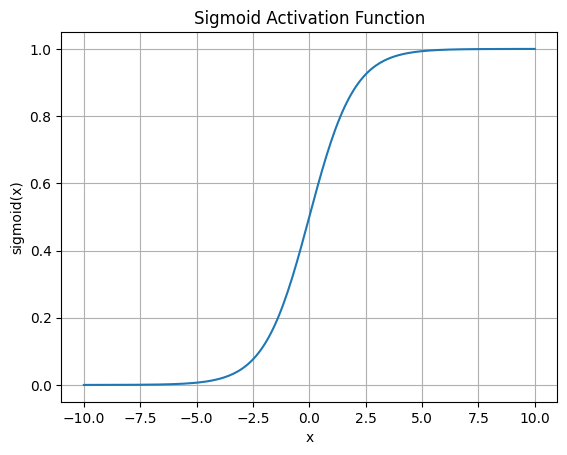

In [8]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

 # Test examples
print("sigmoid(100) =", sigmoid(100))  # ~1.0
print("sigmoid(1)   =", sigmoid(1))    # ~0.731

# Visualization
x = np.linspace(-10, 10, 200)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.title("Sigmoid Activation Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.show()

## 2. Tanh Function  

**Formula:**
\[
\tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
\]

- Maps input to range (-1,1)  
- **Zero-centered** → usually better than sigmoid for hidden layers  
- Still saturates for very large |x|  


tanh(-100) = -1.0
tanh(7)    = 0.9999983369439447


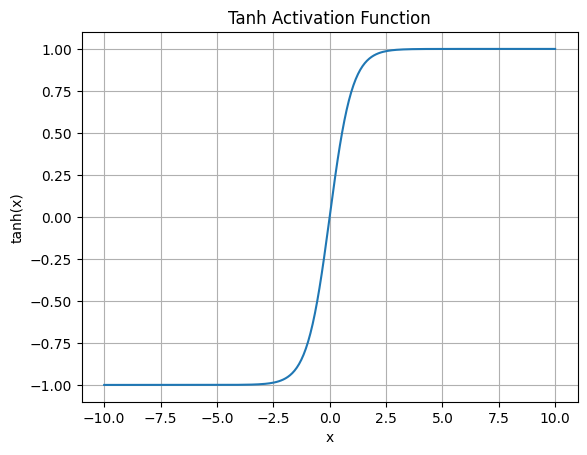

In [9]:
def tanh(x):
    return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

# Test examples
print("tanh(-100) =", tanh(-100))  # ~-1.0
print("tanh(7)    =", tanh(7))     # ~0.999998

# Visualization
x = np.linspace(-10, 10, 200)
y = np.tanh(x)

plt.plot(x, y)
plt.title("Tanh Activation Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.show()

## 3. ReLU (Rectified Linear Unit)  

**Formula:**
\[
\text{ReLU}(x)=\max(0,x)
\]

- Very popular in deep learning  
- Fast & simple  
- Risk: "Dying ReLU" (outputs stuck at 0 for all negative inputs)  


relu(23) = 23
relu(-10) = 0


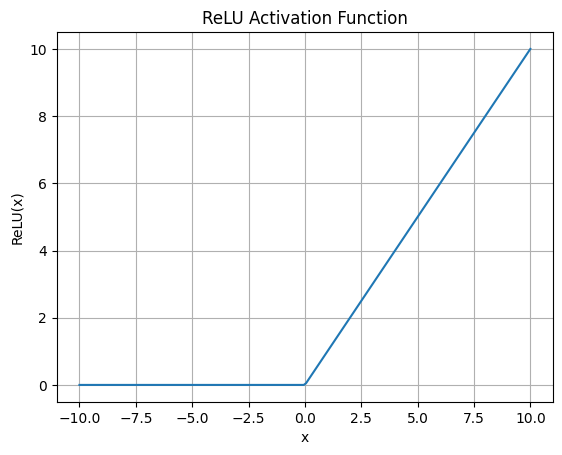

In [10]:
def relu(x):
    return max(0, x)

# Test examples
print("relu(23) =", relu(23))   # 23
print("relu(-10) =", relu(-10)) # 0

# Visualization
x = np.linspace(-10, 10, 200)
y = np.maximum(0, x)

plt.plot(x, y)
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()


## 4. Leaky ReLU  

**Formula:**
\[
f(x)=\begin{cases}
x & x \geq 0 \\
\alpha x & x < 0
\end{cases}
\]

- Fixes "dying ReLU" problem by allowing a small slope (α) for negative values  
- Common α values: 0.01 or 0.1  


leaky_relu(-10) = -0.1
leaky_relu(2)   = 2


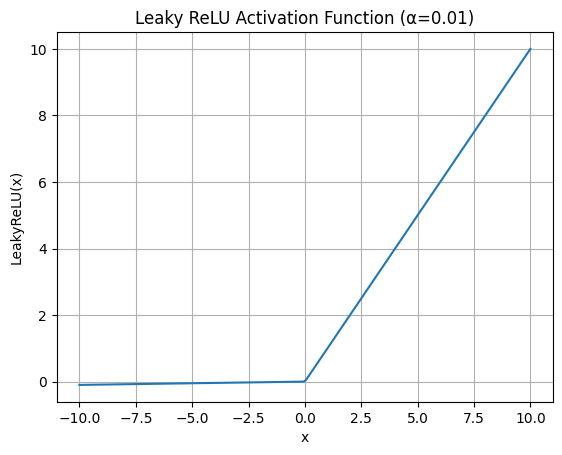

In [11]:
def leaky_relu(x, alpha=0.01):
    return x if x >= 0 else alpha * x

# Test examples
print("leaky_relu(-10) =", leaky_relu(-10))   # -0.1
print("leaky_relu(2)   =", leaky_relu(2))     # 2

# Visualization
alpha = 0.01
x = np.linspace(-10, 10, 200)
y = np.where(x >= 0, x, alpha * x)

plt.plot(x, y)
plt.title("Leaky ReLU Activation Function (α=0.01)")
plt.xlabel("x")
plt.ylabel("LeakyReLU(x)")
plt.grid(True)
plt.show()

## 🔄 (Optional) Derivatives for Backpropagation

During training, we need **derivatives** of activation functions for backpropagation.  
Here are the scalar derivatives:

- **Sigmoid**:  
  \[
  \sigma'(x) = \sigma(x)(1 - \sigma(x))
  \]

- **Tanh**:  
  \[
  \tanh'(x) = 1 - \tanh^2(x)
  \]

- **ReLU**:  
  \[
  f'(x) = \begin{cases} 0 & x < 0 \\ 1 & x > 0 \end{cases}
  \]

- **Leaky ReLU**:  
  \[
  f'(x) = \begin{cases} \alpha & x < 0 \\ 1 & x > 0 \end{cases}
  \]


In [ ]:
# Sigmoid derivative
def d_sigmoid_from_y(y):
    return y * (1 - y)

# Tanh derivative 
def d_tanh_from_y(y):
    return 1 - y*y

# ReLU derivative
def d_relu(x):
    return 1.0 if x > 0 else 0.0  

# Leaky ReLU derivative
def d_leaky_relu(x, alpha=0.01):
    return 1.0 if x > 0 else alpha

print("d_sigmoid_from_y(0.73) ≈", d_sigmoid_from_y(0.73))
print("d_tanh_from_y(0.99) ≈", d_tanh_from_y(0.99))
print("d_relu(-2) =", d_relu(-2))
print("d_leaky_relu(-2) =", d_leaky_relu(-2))


d_sigmoid_from_y(0.73) ≈ 0.1971
d_tanh_from_y(0.99) ≈ 0.01990000000000003
d_relu(-2) = 0.0
d_leaky_relu(-2) = 0.01


## ⚡ (Optional) Vectorized NumPy Versions

For efficiency, we often apply activation functions to **arrays** (vectors, matrices, tensors).  
Here are vectorized versions using NumPy — these operate on the entire array at once.


In [ ]:
import numpy as np

# Vectorized Sigmoid (numerically stable)
def sigmoid_np(x):
    x = np.asarray(x, dtype=np.float64)
    pos = x >= 0
    neg = ~pos
    out = np.empty_like(x)
    out[pos] = 1 / (1 + np.exp(-x[pos]))
    z = np.exp(x[neg])
    out[neg] = z / (1 + z)
    return out

# Vectorized Tanh 
def tanh_np(x):
    return np.tanh(x)

# Vectorized ReLU
def relu_np(x):
    x = np.asarray(x)
    return np.maximum(0, x)

# Vectorized Leaky ReLU
def leaky_relu_np(x, alpha=0.01):
    x = np.asarray(x, dtype=np.float64)
    return np.where(x >= 0, x, alpha * x)

# Quick test with an array
arr = np.array([-3, -1, 0, 1, 3])
print("sigmoid_np(arr) =", sigmoid_np(arr))
print("tanh_np(arr) =", tanh_np(arr))
print("relu_np(arr) =", relu_np(arr))
print("leaky_relu_np(arr) =", leaky_relu_np(arr))


sigmoid_np(arr) = [0.04742587 0.26894142 0.5        0.73105858 0.95257413]
tanh_np(arr) = [-0.99505475 -0.76159416  0.          0.76159416  0.99505475]
relu_np(arr) = [0 0 0 1 3]
leaky_relu_np(arr) = [-0.03 -0.01  0.    1.    3.  ]


## 📊 (Optional) Compare All Activations

To better understand, let’s plot **Sigmoid, Tanh, ReLU, and Leaky ReLU** together.


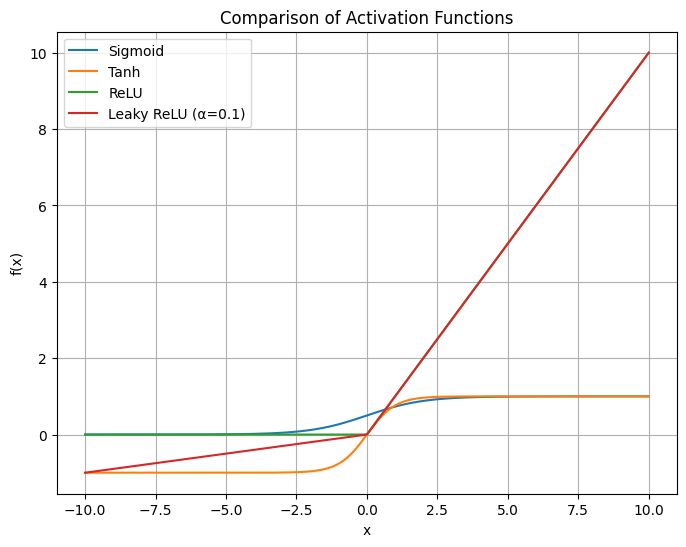

In [14]:
x = np.linspace(-10, 10, 400)

plt.figure(figsize=(8,6))
plt.plot(x, sigmoid_np(x), label="Sigmoid")
plt.plot(x, tanh_np(x), label="Tanh")
plt.plot(x, relu_np(x), label="ReLU")
plt.plot(x, leaky_relu_np(x, alpha=0.1), label="Leaky ReLU (α=0.1)")

plt.title("Comparison of Activation Functions")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
